<a href="https://colab.research.google.com/github/aaaksenova/wsi_bach_thesis/blob/change/Semantic_markup_rnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compairison of RNC senamtic markup and RuWordNet senses

In [1]:
! pip install ruwordnet
! ruwordnet download

  Created wheel for ruwordnet: filename=ruwordnet-0.0.3-py3-none-any.whl size=11621 sha256=8fb1b835b036946701879841f1298d1e3e4606568885246262d81f11d8d4e4c2
  Stored in directory: /root/.cache/pip/wheels/44/82/4b/016af6cfab5855b87d3015eee1650f5560ee9fab885c7ef6b3
Successfully built ruwordnet
downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.2/ruwordnet.db


In [2]:
from ruwordnet import RuWordNet
import pandas as pd

wn = RuWordNet()

In [3]:
df = pd.read_excel('sem_rnc.xlsx')
df.columns

Index(['Cat', 'Lemma', 'n', 'r', 't', 'ev', 'd', 'd.1', 'der', 'dt', 'Ex',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')

In [4]:
df = df[['Cat', 'Lemma', 'n', 'r', 't', 'ev', 'd', 'd.1', 'der', 'dt', 'Ex']]
df

,Cat,Lemma,n,r,t,ev,d,d.1,der,dt,Ex
0,A,абортивный,1,rel,NaN,NaN,NaN,NaN,s,physiol/abstr,А. метод
1,A,абортивный,NaN,rel,NaN,NaN,NaN,NaN,s,physiol/abstr,Абортивные органы растений
2,A,абсолютный,1,rel,NaN,NaN,NaN,NaN,s,NaN,Абсолютная величина действительного числа
3,A,абсолютный,NaN,qual,degr:max:@magn,NaN,NaN,NaN,s,NaN,А. покой
4,A,абстрактный,1,rel,NaN,NaN,NaN,NaN,s,ment/abstr,Абстрактное понятие
...,...,...,...,...,...,...,...,...,...,...,...
375644,V,этимологизировать,1,NaN,NaN,NaN,NaN,NaN,NaN,s,NaN
375645,V,юнеть,1,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN
375646,V,языкоблудствовать,1,NaN,NaN,NaN,ev:neg,NaN,NaN,s,NaN
375647,V,якать,1,NaN,NaN,NaN,NaN,NaN,NaN,spro,NaN


In [18]:
def ruwordnet_comparison(filepath):
    '''
    Function processes the given dataframe and 
    returns the number of senses for each word
    '''

    df = pd.read_excel(filepath)
    df.Lemma = df.Lemma.astype('str')
    grouped_df = pd.DataFrame(df.Lemma.value_counts().reset_index().values, columns=["Lemma", "rnc_num_senses"])
    grouped_df['ruwordnet_num_senses'] = grouped_df['Lemma'].apply(lambda x: len(wn.get_senses(x)))
    grouped_df['deviation'] = - grouped_df['rnc_num_senses'] + grouped_df['ruwordnet_num_senses']
    
    return grouped_df

In [19]:
df_rnc_wordnet = ruwordnet_comparison('sem_rnc.xlsx')
df_rnc_wordnet

,Lemma,rnc_num_senses,ruwordnet_num_senses,deviation
0,идти,26,8,-18
1,принять,18,7,-11
2,сила,18,4,-14
3,пройти,17,6,-11
4,поднять,17,2,-15
...,...,...,...,...
346802,лайпанова,1,0,-1
346803,бобунова,1,0,-1
346804,спрыснуться,1,0,-1
346805,щавелевый,1,1,0


In [36]:
df_rnc_wordnet.deviation.value_counts()

-1     297832
 0      33536
-2       6856
 1       5346
 2       1097
-3       1063
 3        400
-4        317
 4        122
-5         88
 5         44
-6         43
-7         27
 6         11
-9          6
-10         4
-8          4
-11         3
-12         2
 7          2
-18         1
 8          1
-14         1
-15         1
Name: deviation, dtype: int64

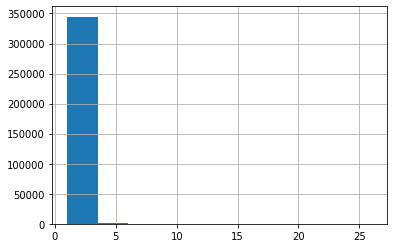

In [37]:
df_rnc_wordnet.rnc_num_senses.hist()

In [30]:
df_rnc_wordnet.rnc_num_senses.value_counts()

1     327841
2      13540
3       3206
4       1211
5        503
6        222
7        126
8         49
9         44
10        32
11        15
12         7
13         3
18         2
17         2
14         1
15         1
16         1
26         1
Name: rnc_num_senses, dtype: int64

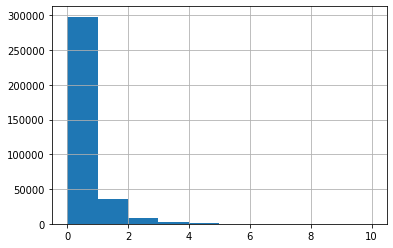

In [21]:
df_rnc_wordnet.ruwordnet_num_senses.hist()

In [32]:
df_rnc_wordnet.ruwordnet_num_senses.value_counts()

0     298197
1      35700
2       8864
3       2444
4       1008
5        385
6        142
7         45
8         16
9          5
10         1
Name: ruwordnet_num_senses, dtype: int64

As one can see, most of the words from RNC do not exist in RuWordNet and in general RNC semantic markup is more fine-grained.